# Importing Our Data

In [1]:

import pandas as pd

file_path = 'C:/Users/Martin/Downloads/adjusted_combined_data_search_corrected.csv'
df = pd.read_csv(file_path)

df.head()


,User ID,Artist,Song,Event Type,Timestamp,Playlist Name,Search Query
0,User_8082,KoRn,Freak on a Leash,Search Used,2024-08-16 01:56:29.581239,Nu Metal,Search for KoRn
1,User_4411,KoRn,Freak on a Leash,Liked,2024-08-04 19:18:29.581239,Nu Metal,Unknown
2,User_5976,KoRn,Freak on a Leash,Liked,2024-08-11 18:51:29.581239,Nu Metal,Search for KoRn
3,User_5688,KoRn,Freak on a Leash,Played,2024-08-06 22:48:29.581239,Nu Metal,Search for Freak on a Leash
4,User_1834,KoRn,Freak on a Leash,Shared,2024-08-19 00:41:29.581239,Nu Metal,Unknown


# Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144929 entries, 0 to 144928
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User ID        144929 non-null  object
 1   Artist         144929 non-null  object
 2   Song           144929 non-null  object
 3   Event Type     144929 non-null  object
 4   Timestamp      144929 non-null  object
 5   Playlist Name  144929 non-null  object
 6   Search Query   144929 non-null  object
dtypes: object(7)
memory usage: 7.7+ MB


In [3]:
df.describe(include='all')

,User ID,Artist,Song,Event Type,Timestamp,Playlist Name,Search Query
count,144929,144929,144929,144929,144929,144929,144929
unique,10000,47,237,5,58561,15,285
top,User_9919,Taylor Swift,Shake It Off,Played,2024-08-11 14:00:56.352002,Unknown,Unknown
freq,29,5932,1497,54510,11,52283,29041


In [4]:
df.isnull().sum()

User ID          0
Artist           0
Song             0
Event Type       0
Timestamp        0
Playlist Name    0
Search Query     0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Data Cleaning

In [6]:
df = df.drop_duplicates()

In [7]:
df_cleaned = df.copy()

In [8]:
df_cleaned['Playlist Name'].fillna('Unknown', inplace=True)

In [9]:
df_cleaned['Search Query'].fillna('Unknown', inplace=True)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144929 entries, 0 to 144928
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User ID        144929 non-null  object
 1   Artist         144929 non-null  object
 2   Song           144929 non-null  object
 3   Event Type     144929 non-null  object
 4   Timestamp      144929 non-null  object
 5   Playlist Name  144929 non-null  object
 6   Search Query   144929 non-null  object
dtypes: object(7)
memory usage: 8.8+ MB


# Descriptive Analysis

In [11]:
num_events = df_cleaned['Event Type'].nunique()

In [12]:
num_artists = df_cleaned['Artist'].nunique()

In [13]:
print(f"Number of unique event types: {num_events}")

Number of unique event types: 5


In [14]:
print(f"Number of unique artists: {num_artists}")

Number of unique artists: 47


In [15]:
event_distribution = df_cleaned['Event Type'].value_counts()

In [16]:
print(event_distribution)

Played              54510
Liked               37036
Search Used         24928
Shared              21494
Playlist Created     6961
Name: Event Type, dtype: int64


In [17]:
top_artists = df_cleaned['Artist'].value_counts().head(10)

In [18]:
print(top_artists)

Taylor Swift      5932
Olivia Rodrigo    4080
Kendrick Lamar    3995
Drake             3851
Harry Styles      3760
Radiohead         3684
OutKast           3670
Katy Perry        3611
Adele             3526
Jay-Z             3476
Name: Artist, dtype: int64


# Visualization of Distributions and Trends

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

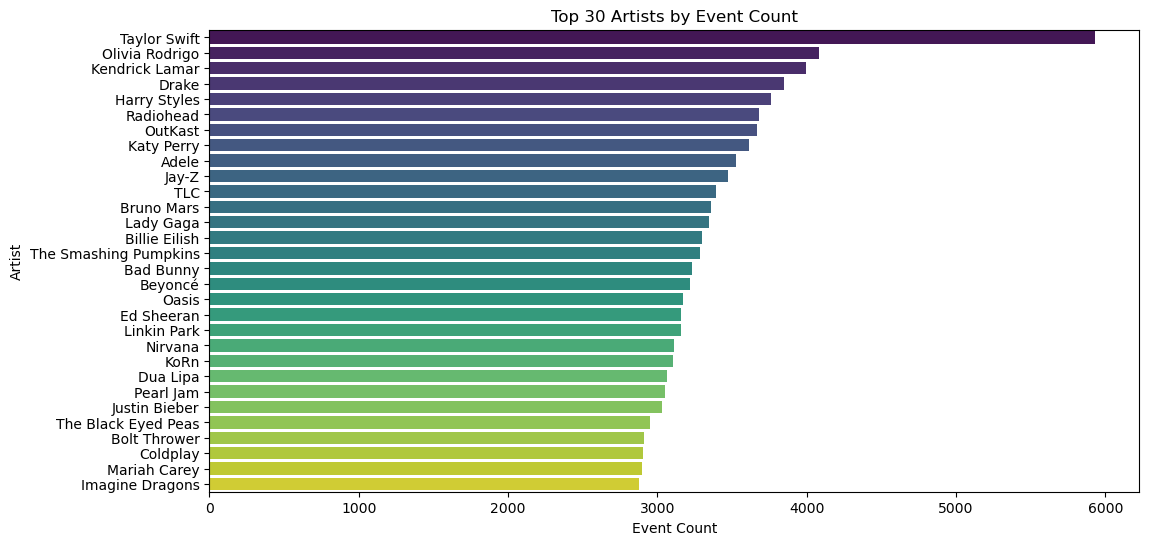

In [20]:
# Distribution of Artists
plt.figure(figsize=(12, 6))
artist_distribution = df_cleaned['Artist'].value_counts().head(30)  # Top 30 most frequent artists
sns.barplot(x=artist_distribution.values, y=artist_distribution.index, palette='viridis')
plt.title('Top 30 Artists by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Artist')
plt.show()

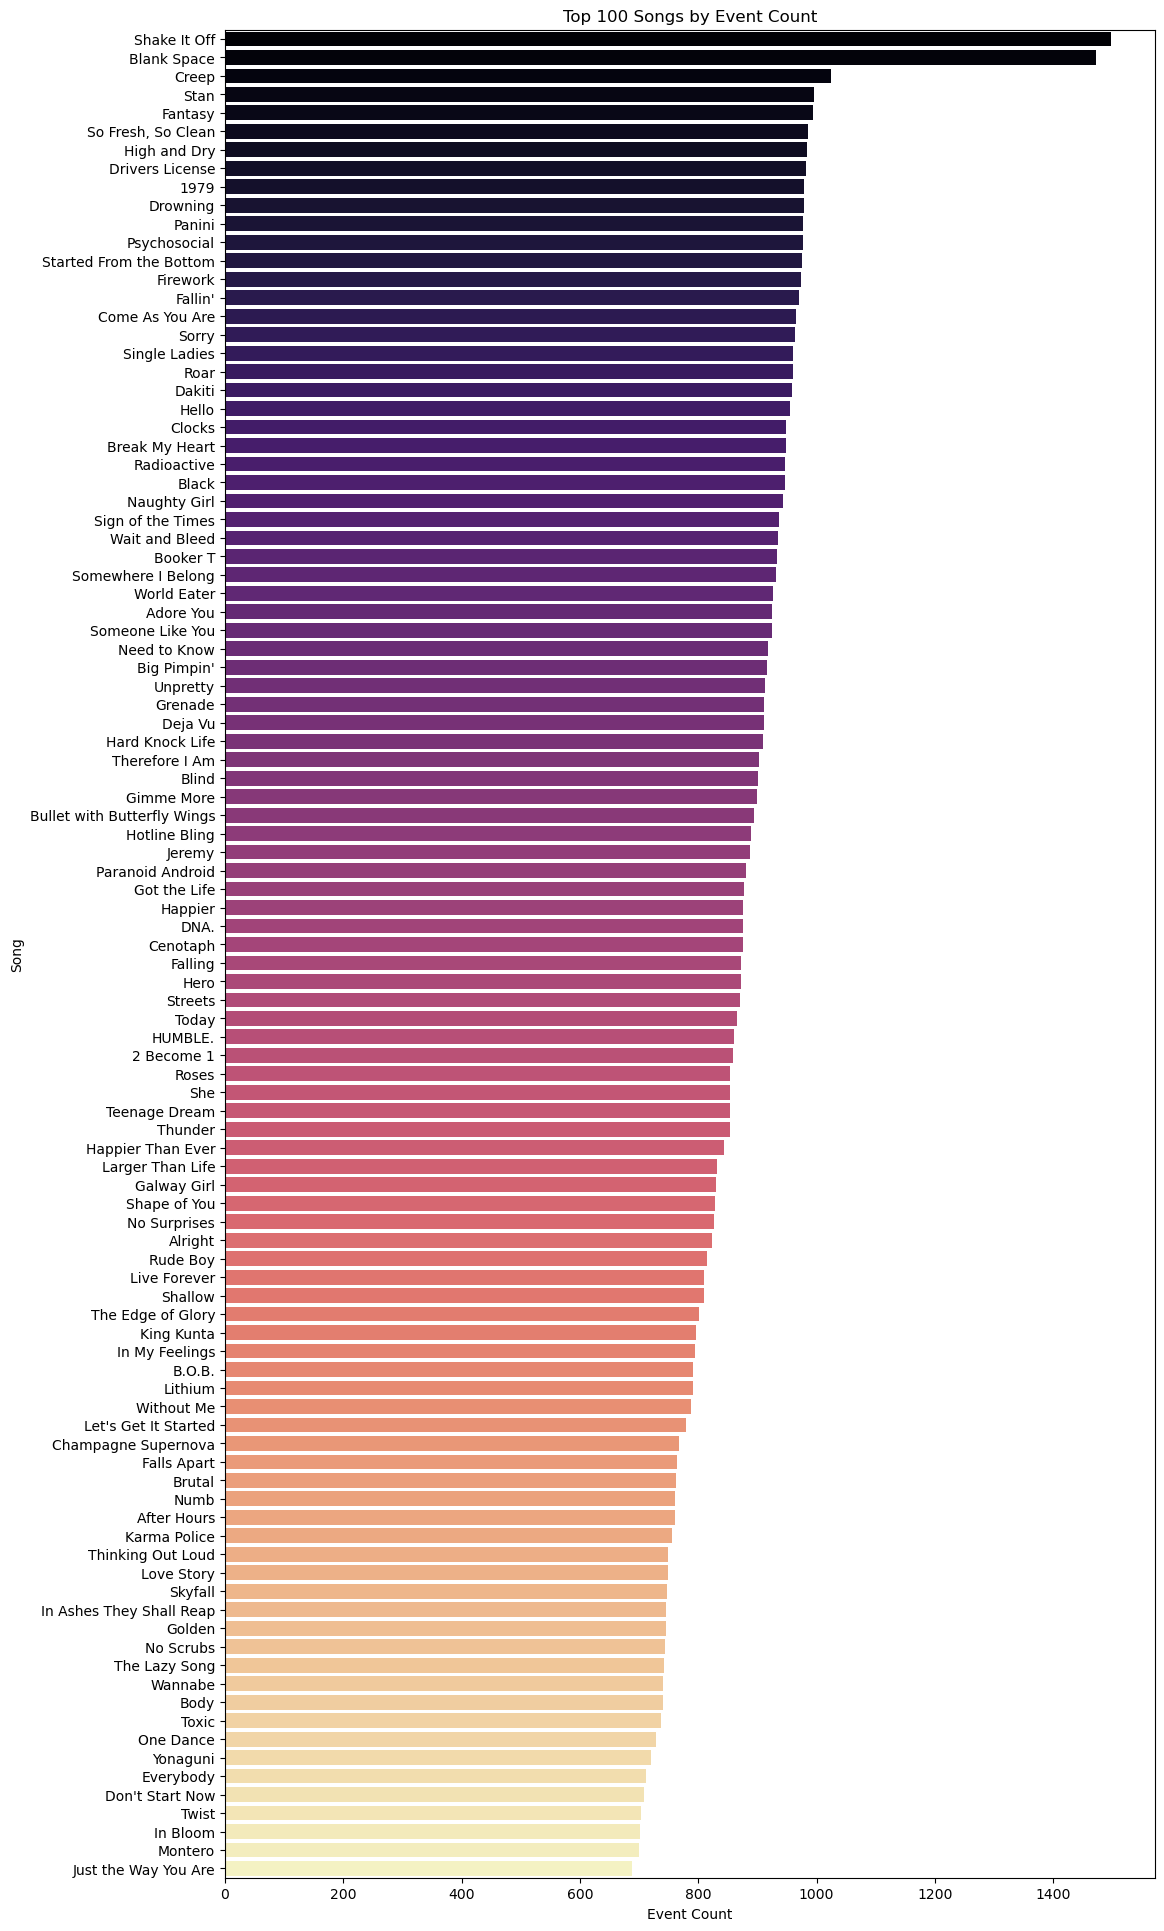

In [21]:
# Distribution of Songs
plt.figure(figsize=(12, 24))
song_distribution = df_cleaned['Song'].value_counts().head(100)  # Top 100 most frequent songs
sns.barplot(x=song_distribution.values, y=song_distribution.index, palette='magma')
plt.title('Top 100 Songs by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Song')
plt.show()

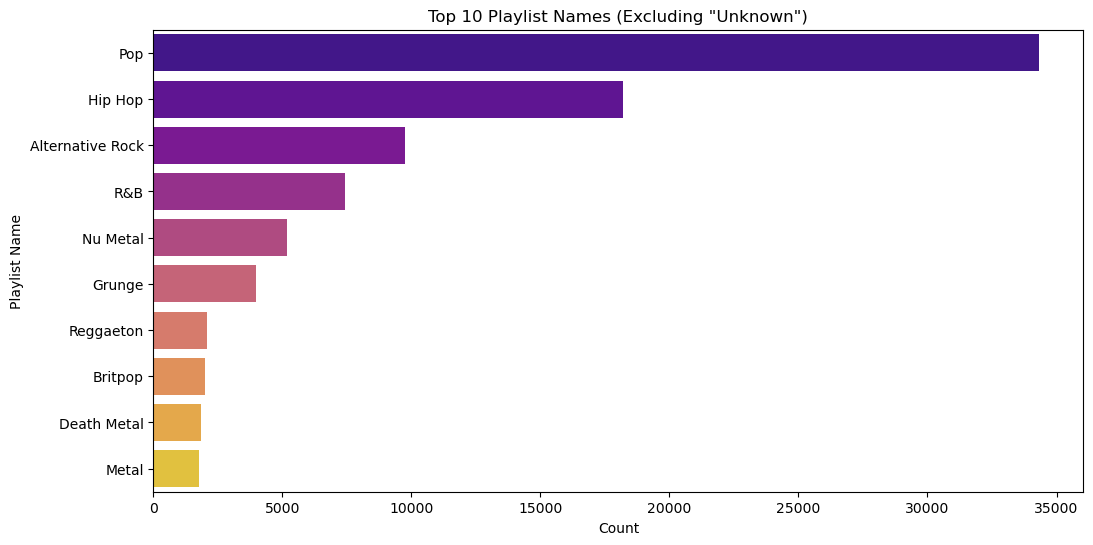

In [22]:
plt.figure(figsize=(12, 6))
playlist_distribution = df_cleaned[df_cleaned['Playlist Name'] != 'Unknown']['Playlist Name'].value_counts().head(10)
sns.barplot(x=playlist_distribution.values, y=playlist_distribution.index, palette='plasma')
plt.title('Top 10 Playlist Names (Excluding "Unknown")')
plt.xlabel('Count')
plt.ylabel('Playlist Name')
plt.show()



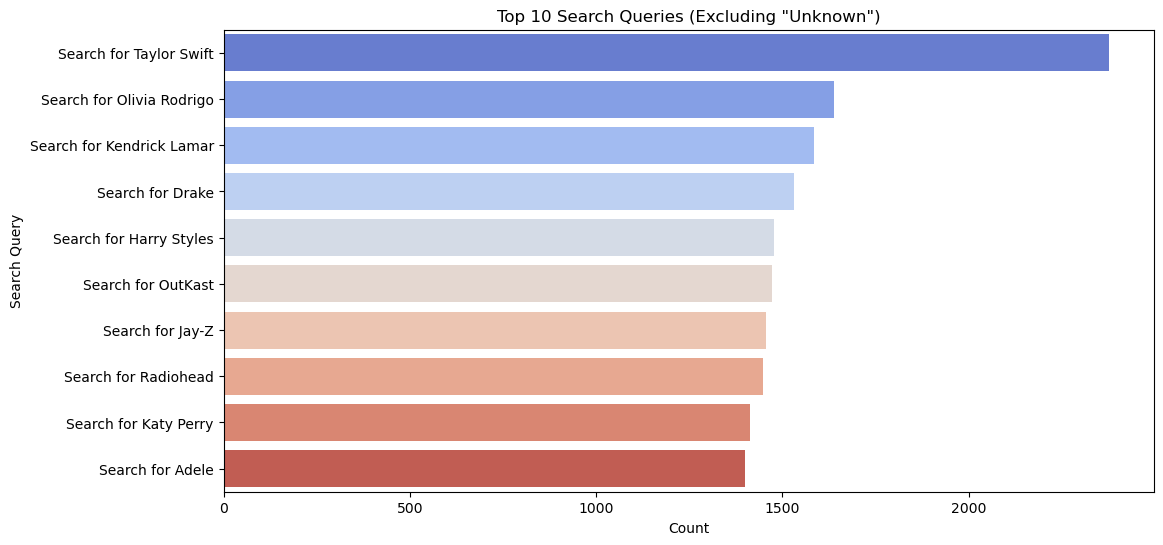

In [23]:
plt.figure(figsize=(12, 6))
search_query_distribution = df[df['Search Query'] != 'Unknown']['Search Query'].value_counts().head(10)
sns.barplot(x=search_query_distribution.values, y=search_query_distribution.index, palette='coolwarm')
plt.title('Top 10 Search Queries (Excluding "Unknown")')
plt.xlabel('Count')
plt.ylabel('Search Query')
plt.show()


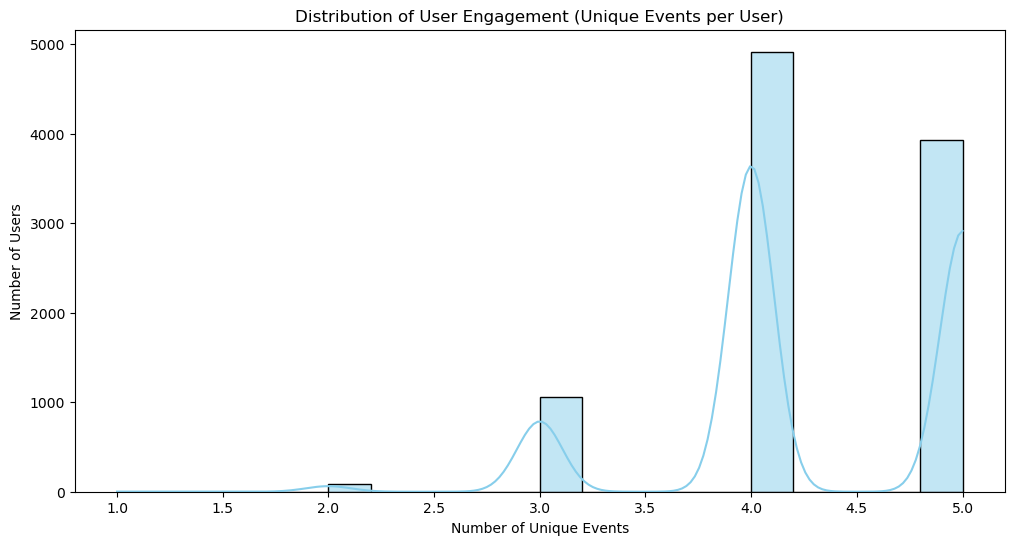

In [24]:
user_engagement = df_cleaned.groupby('User ID')['Event Type'].nunique()

plt.figure(figsize=(12, 6))
sns.histplot(user_engagement, bins=20, kde=True, color='skyblue')
plt.title('Distribution of User Engagement (Unique Events per User)')
plt.xlabel('Number of Unique Events')
plt.ylabel('Number of Users')
plt.show()


# User Segmentation by Engagement

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Here we aggregate user data by event type counts
user_event_matrix = df.pivot_table(index='User ID', columns='Event Type', aggfunc='size', fill_value=0)

# Now we apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
user_event_matrix['Cluster'] = kmeans.fit_predict(user_event_matrix)


C:\Users\Martin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


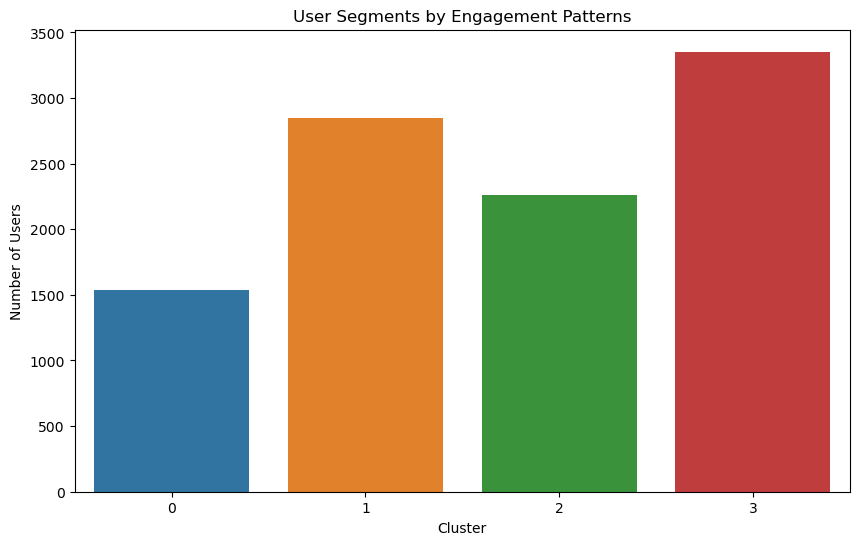

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=user_event_matrix)
plt.title('User Segments by Engagement Patterns')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# Analysis of User Segments by Engagement Patterns:
# - Cluster 0: Least engaged, small group with low interaction; target with incentives to explore more features.
# - Cluster 1: Moderately engaged, more consistent usage; offer features to deepen interaction.
# - Cluster 2: Highly engaged but specific; focus on tailored content to match their focused interests.
# - Cluster 3: Broadly engaged, largest and most active group; retain with diverse content and premium features.

# Usage:
# - Target low-engagement users (Cluster 0) with personalized recommendations.
# - Enhance features for Clusters 1 and 2 to increase engagement.
# - Retain Cluster 3 users by maintaining diverse and engaging content.

# Artist and Song Popularity Analysis

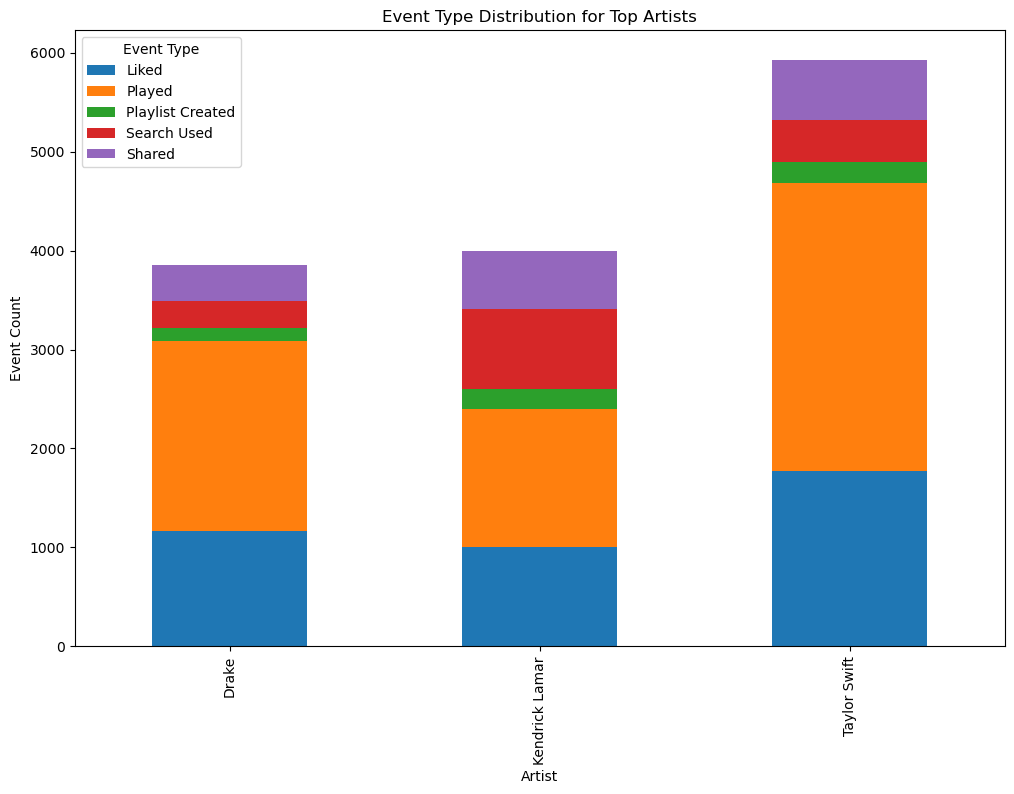

In [27]:
# Here we analyze event types for top artists
top_artists_events = df[df['Artist'].isin(['Taylor Swift', 'Drake', 'Kendrick Lamar'])] # Example artists
artist_event_distribution = top_artists_events.groupby(['Artist', 'Event Type']).size().unstack().fillna(0)

# Now, let's visualize event distribution for the top artists
artist_event_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Event Type Distribution for Top Artists')
plt.xlabel('Artist')
plt.ylabel('Event Count')
plt.show()

In [29]:
# Analysis of Event Type Distribution for Top Artists:
# - Taylor Swift: Highest engagement across all event types; ideal for exclusive content or special playlists.
# - Kendrick Lamar: Balanced engagement; focus on increasing sharing and playlist creation.
# - Drake: Primarily "Played" events; consider strategies to boost "Liked" and "Shared" events.

# Predictive Analysis of Popularity

In [37]:
!pip install xgboost

                                              0.0/124.9 MB ? eta -:--:--
                                              0.1/124.9 MB 3.3 MB/s eta 0:00:38
                                              0.2/124.9 MB 2.5 MB/s eta 0:00:50
                                              0.3/124.9 MB 2.4 MB/s eta 0:00:53
                                              0.4/124.9 MB 2.5 MB/s eta 0:00:50
                                              0.6/124.9 MB 2.5 MB/s eta 0:00:50
                                              0.7/124.9 MB 2.7 MB/s eta 0:00:47
                                              0.8/124.9 MB 2.5 MB/s eta 0:00:50
                                              0.9/124.9 MB 2.5 MB/s eta 0:00:50
                                              1.0/124.9 MB 2.5 MB/s eta 0:00:49
                                              1.2/124.9 MB 2.5 MB/s eta 0:00:49
                                              1.3/124.9 MB 2.5 MB/s eta 0:00:50
                                              1

In [41]:
# Define artist popularity levels
df['Artist Popularity'] = df.groupby('Artist')['Event Type'].transform('count')
df['Popularity Level'] = pd.qcut(df['Artist Popularity'], q=3, labels=['Low', 'Medium', 'High'])

# Define features and target
X = pd.get_dummies(df[['Playlist Name', 'Hour', 'Search Query']], drop_first=True)
y = df['Popularity Level']

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.92      0.89     13831
         Low       0.93      0.87      0.90     14584
      Medium       0.91      0.90      0.91     15064

    accuracy                           0.90     43479
   macro avg       0.90      0.90      0.90     43479
weighted avg       0.90      0.90      0.90     43479



In [ ]:
# Analysis Overview:
# Predicting artist popularity levels (Low, Medium, High) based on playlist names, 
# search queries, and the hour of interaction using a Random Forest Classifier.

# Results:
# - Achieved 90% accuracy, indicating strong predictive power of selected features.
# - High and Medium popularity levels were predicted with high precision and recall.
# - The model performed well across all popularity levels, with slight variation in predicting low popularity.

# Interpretation:
# - Playlist names and search queries are key drivers of artist popularity.
# - Insights can inform marketing strategies and content recommendations.

# Conclusion:
# The model effectively predicts artist popularity, offering valuable insights into 
# engagement patterns that drive popularity on the platform.

# Feature Importance

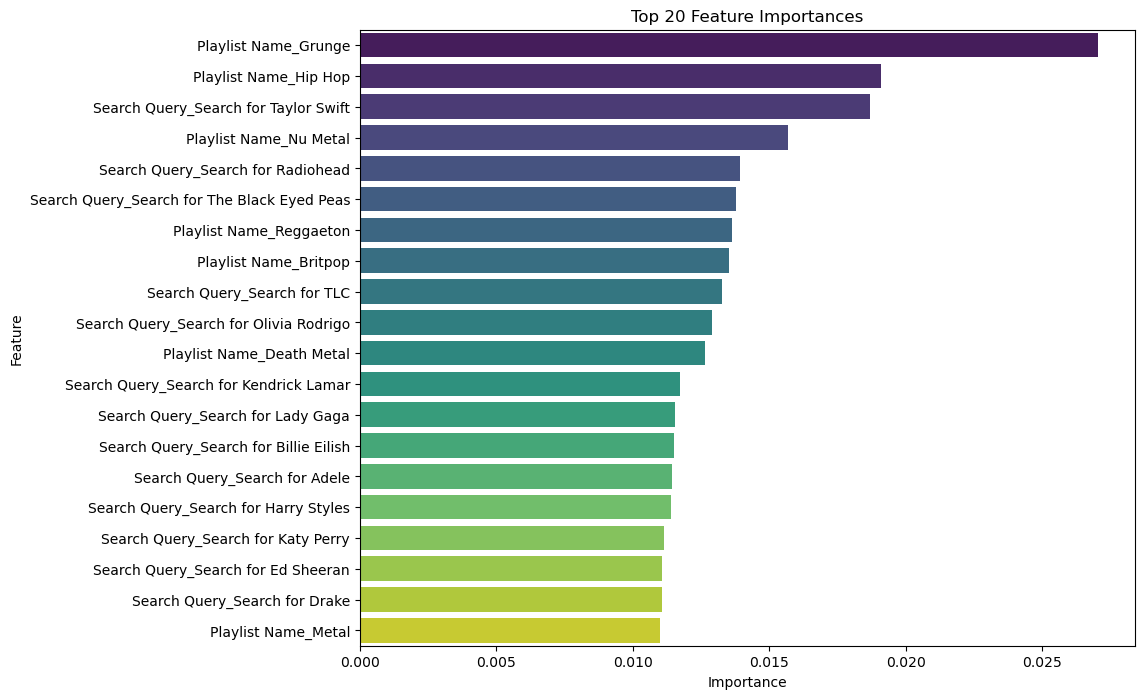

In [43]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

top_n = 20
top_features = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
plt.title(f'Top {top_n} Feature Importances')
plt.show()

In [ ]:
# Feature Importance Analysis:
# - Analyzed the top 20 most important features contributing to the model's predictions of artist popularity.

# Key Findings:
# - The 'Grunge' playlist was the most important feature, indicating that user engagement with this playlist
#   strongly influences artist popularity predictions.
# - High importance was also found for 'Hip Hop' and 'Nu Metal' playlists, along with search queries for 
#   specific artists like Taylor Swift and Radiohead.

# Interpretation:
# - The dominance of the 'Grunge' playlist suggests that users who interact with this playlist have 
#   distinct behaviors that significantly impact artist popularity.
# - The variety of important search queries and playlists highlights the diverse ways users engage 
#   with content, affecting the popularity of different artists.

# Conclusion:
# - These insights reveal which specific playlists and search behaviors are most influential in driving 
#   artist popularity, offering strategic opportunities for content curation and user engagement.